In [9]:
import pandas as pd

In [58]:
df_Labs=pd.read_excel("cardiac_outcomes.xlsx","Labs")
df_Hospitalization_Discharge=pd.read_excel("cardiac_outcomes.xlsx","Hospitalization_Discharge")
df_CardiacComplications=pd.read_excel("cardiac_outcomes.xlsx","CardiacComplications")
df_Responsivenes=pd.read_excel("cardiac_outcomes.xlsx","Responsivenes")
df_PatientHistory=pd.read_excel("cardiac_outcomes.xlsx","PatientHistory")
df_Demography=pd.read_excel("cardiac_outcomes.xlsx","Demography")
df_Patient_Precriptions=pd.read_excel("cardiac_outcomes.xlsx","Patient_Precriptions")

In [49]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install psycopg2-binary

In [68]:
import psycopg2
conn = psycopg2.connect(database="Cardiology",host='localhost',port='5432',user="postgres",password="Admin")

# Q49 Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)


In [75]:
import psycopg2
conn = psycopg2.connect(database="Cardiology",host='localhost',port='5432',user="postgres",password="Admin")
cur = conn.cursor()
cur.execute ("""select * from demography where gender = 'Male';""")
rows=cur.fetchall()
conn.commit()
conn.close()
for row in rows:
    print(row)

('857781', 'Male', 50.0, 1.64, 18.59012493, 'UrbanResident', '69-79')
('866418', 'Male', 70.0, 1.7, 24.22145329, 'farmer', '59-69')
('775928', 'Male', 65.0, 1.7, 22.49134948, 'UrbanResident', '69-79')
('844094', 'Male', 60.0, 1.65, 22.03856749, 'UrbanResident', '79-89')
('802296', 'Male', 70.0, 1.72, 23.66143862, 'UrbanResident', '79-89')
('744167', 'Male', 55.0, 1.6, 21.484375, 'farmer', '49-59')
('759947', 'Male', 60.0, 1.6, 23.4375, 'UrbanResident', '79-89')
('729522', 'Male', 60.0, 1.7, 20.76124567, 'UrbanResident', '49-59')
('814869', 'Male', 62.0, 1.68, 21.96712018, 'UrbanResident', '59-69')
('764380', 'Male', 56.0, 1.68, 19.84126984, 'UrbanResident', '69-79')
('861240', 'Male', 57.5, 1.6, 22.4609375, 'UrbanResident', '79-89')
('848044', 'Male', 55.0, 1.66, 19.95935549, 'UrbanResident', '69-79')
('739615', 'Male', 45.0, 1.6, 17.578125, 'farmer', '59-69')
('837384', 'Male', 78.0, 1.6, 30.46875, 'UrbanResident', '59-69')
('798240', 'Male', 65.0, 1.65, 23.87511478, 'farmer', '69-79'

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
print (sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Q 50 Display the lab details of the patient with maximum pulse using the .loc

In [30]:
df_Labs=pd.read_excel("cardiac_outcomes.xlsx","Labs")
max_pulse=df_Labs['pulse'].max()
print("---Lab Details with maximum pulse---")
max_pulse_loc=df_Labs.loc[max_pulse,:]
print(max_pulse_loc)

---Lab Details with maximum pulse---
inpatient_number           729509.0
body_temperature               36.1
pulse                          60.0
respiration                    18.0
systolic_blood_pressure       130.0
                             ...   
partial_oxygen_pressure         NaN
oxyhemoglobin                   NaN
anion_gap                       NaN
free_calcium                    NaN
total_hemoglobin                NaN
Name: 198, Length: 107, dtype: float64


# Q51 Display a violin chart to show distribution of Pulse Rate against age.

<Axes: xlabel='ageCat', ylabel='pulse'>

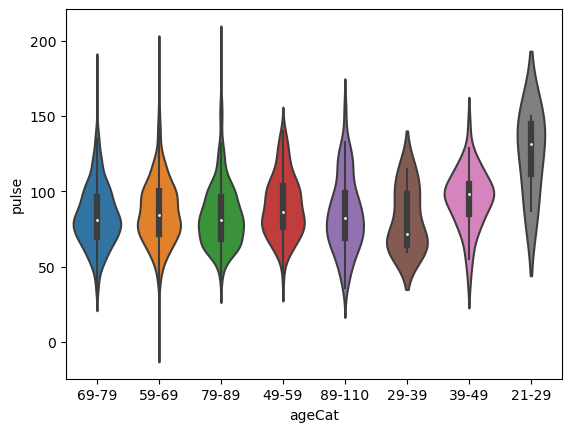

In [90]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.violinplot(x=df_Demography["ageCat"],y=df_Labs["pulse"], fill=False) 

# Q52 Create a Point Plot on Age against time to readmission.

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='ageCat', ylabel='readmission_time_days_from_admission'>

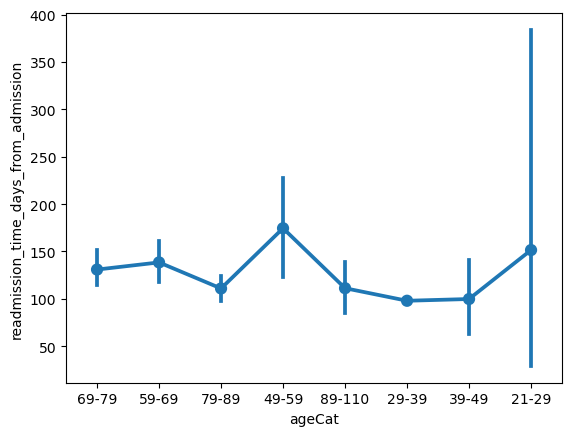

In [55]:
sns.pointplot(x=df_Demography["ageCat"],y=df_Hospitalization_Discharge["readmission_time_days_from_admission"]) 

# Q53 What is the correlation between CCI score and outcome?

In [51]:
df_PatientHistory=pd.read_excel("cardiac_outcomes.xlsx","PatientHistory")
df_Hospitalization_Discharge["outcome_during_hospitalization"]= pd.factorize(df_Hospitalization_Discharge["outcome_during_hospitalization"])[0]
df_Hospitalization_Discharge["outcome_during_hospitalization"].corr(df_PatientHistory['CCI_score'])

0.09384336715987612

# Q54 For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [37]:
listA=[0,1,2,6,8]
for number in listA:
  if number>=0  and number % 2 == 0:
    print(number*number)

0
4
36
64


# Q55 Create a jointplot on diastolic_blood_pressure & length of stay

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

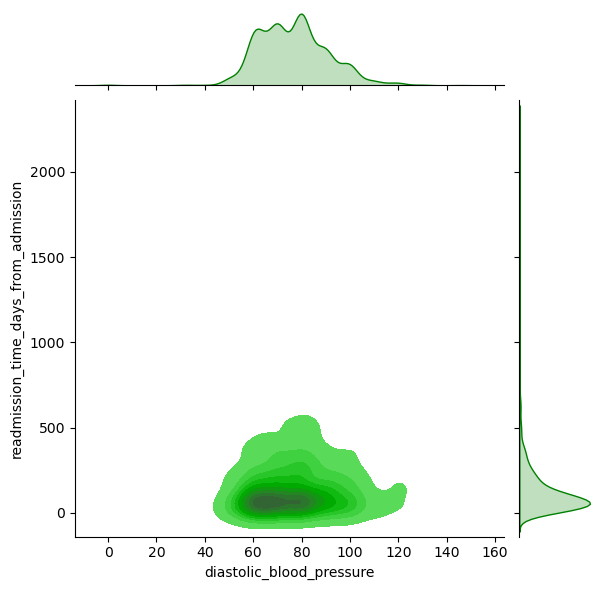

In [72]:
sns.jointplot(x=df_Labs['diastolic_blood_pressure'],y=df_Hospitalization_Discharge["readmission_time_days_from_admission"],kind='kde',color='Green',fill=True)

# Q56 Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [39]:
df_Demography=pd.read_excel("cardiac_outcomes.xlsx","Demography")
##df_Demography.loc=df_Demography.loc[1p01:201,['ageCat','weight']]
start_index = 101
end_index = 201
age_group_weight= df_Demography.loc[start_index:end_index,['ageCat' , 'weight']]
age_group_weight

,ageCat,weight
101,69-79,41.0
102,79-89,64.0
103,79-89,61.0
104,79-89,40.0
105,69-79,73.0
...,...,...
197,79-89,50.0
198,89-110,50.0
199,69-79,50.0
200,59-69,63.0


# Q57 Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values

In [4]:
import pandas as pd
df_Hospitalization_Discharge=pd.read_excel("cardiac_outcomes.xlsx","Hospitalization_Discharge")
pd.pivot_table(data = df_Hospitalization_Discharge,index=["outcome_during_hospitalization"],values=["inpatient_number"],columns=["admission_ward"],aggfunc = 'count')

inpatient_number                       
admission_ward                       Cardiology GeneralWard ICU Others
outcome_during_hospitalization                                        
Alive                                      1472         238  12    168
Dead                                          8           1   1      1
DischargeAgainstOrder                        67          26   2     12

# Q58 Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

Text(0, 0.5, 'dischargeDay')

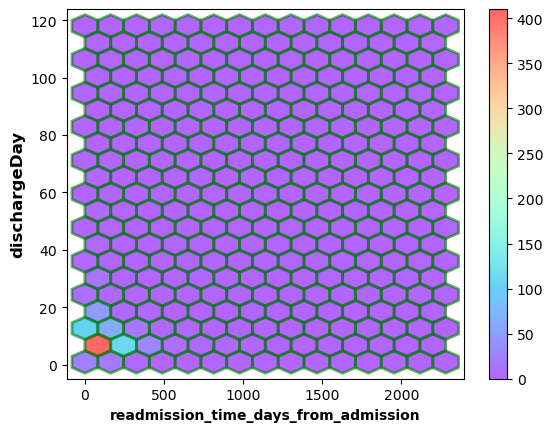

In [40]:
df_Hospitalization_Discharge=pd.read_excel("cardiac_outcomes.xlsx","Hospitalization_Discharge")
import matplotlib.pyplot as plt
df_Hospitalization_Discharge.plot(kind="hexbin",x="readmission_time_days_from_admission",y="dischargeDay",linewidth=2.1,edgecolor="green", linestyle ='solid', alpha=0.6,gridsize=(14,10),cmap="rainbow") 
plt.xlabel("readmission_time_days_from_admission",fontsize=10,fontweight="bold")
plt.ylabel("dischargeDay",fontsize=12,fontweight="bold")

# Q59 Using Sunburst chart display patients Age group, occupation and BMI Group

In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.express as px
import pandas as pd
df_Demography=pd.read_excel("cardiac_outcomes.xlsx","Demography")

### df_Demography = df_Demography.dropna()
fig=px.sunburst(df_Demography,path=["ageCat","occupation","BMI"],maxdepth =-3,width=1000,height=800,color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()            

# Q60 Plot the Density Chart for visit times

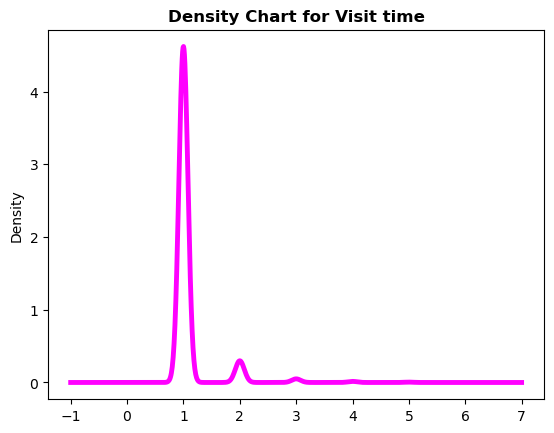

In [22]:
import matplotlib.pyplot as plt
df_Hospitalization_Discharge=pd.read_excel("cardiac_outcomes.xlsx","Hospitalization_Discharge")
df_Hospitalization_Discharge.visit_times.plot.density(color='magenta',linewidth=3.5)
plt.title('Density Chart for Visit time',fontsize=12,fontweight="bold")
plt.show()

# Q61 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [34]:
x = np.arange(start=1,stop=31,step=1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [35]:
y = x.reshape(6,5)
print(y)
print(y.shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
(6, 5)


In [38]:
y[2][0:2],y[3][0:2]

(array([11, 12]), array([16, 17]))

# Q62 What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

In [76]:
import pandas as pd
df_Hospitalization_Discharge=pd.read_excel("cardiac_outcomes.xlsx","Hospitalization_Discharge")
patients_alive_died=df_Hospitalization_Discharge[(df_Hospitalization_Discharge['outcome_during_hospitalization']=='Alive')&(df_Hospitalization_Discharge['death_within_28_days'] == 1)]
total_patients=len(df_Hospitalization_Discharge)
patients_alive_died_num=len(patients_alive_died)
percentage=(patients_alive_died_num/total_patients)*100
percentage

0.398406374501992

In [77]:
df_Labs=pd.read_excel("cardiac_outcomes.xlsx","Labs")
merge_df_Labs=pd.merge(patients_alive_died,df_Labs, on='inpatient_number')
mean_platelet_group=merge_df_Labs['platelet'].mean()
mean_platelet_group

166.875

# Q63 find the patients who have 'h' in their DestinationDischarge and print them

In [18]:
df_Hospitalization_Discharge=pd.read_excel("cardiac_outcomes.xlsx","Hospitalization_Discharge")
Patients_Home=df_Hospitalization_Discharge[df_Hospitalization_Discharge['DestinationDischarge'].str.startswith('H')]
Patients_Home1=Patients_Home.loc[:,'inpatient_number']
print(Patients_Home1)

0       857781
1       743087
2       866418
3       775928
4       810128
         ...  
2002    754589
2003    740689
2004    734280
2005    781004
2007    791864
Name: inpatient_number, Length: 1782, dtype: int64


# Q64 Create a grouped bar chart that shows number of patients by gender and ageCat

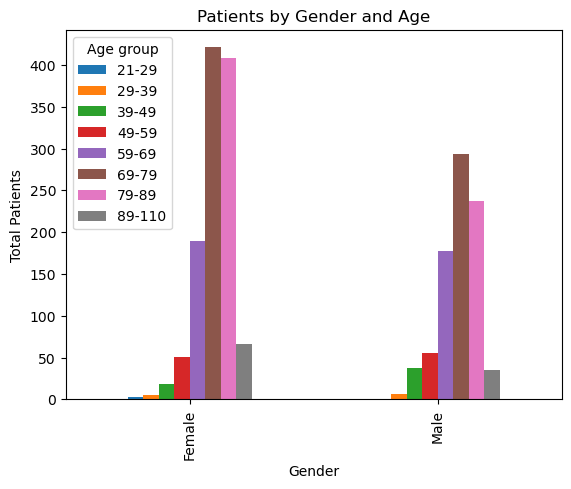

In [4]:
import matplotlib.pyplot as plt
df_Demography=pd.read_excel("cardiac_outcomes.xlsx","Demography")
group_bar=df_Demography.groupby(['gender','ageCat']).size().unstack(fill_value=0)
group_bar.plot(kind='bar',stacked=False)
plt.xlabel('Gender')
plt.ylabel('Total Patients')
plt.title('Patients by Gender and Age')
plt.legend(title='Age group')
plt.show()